# SCP Dataset Exploration and Visualizations
## Overview
This file was created to explore various visualizations of the SCP dataset in order to select interesting visualizations for the SCP Status dashboard.
## Setup

In [68]:
#!pip install pandas
#!pip install matplotlib
#!pip install dash
#!pip install plotly

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import plotly.graph_objects as go
import plotly.express as px

In [100]:
df = pd.read_csv("scp6999augmented.csv")

## Visualizations
### Object classes

In [102]:
primary_classes=["Safe", "Euclid", "Keter"]
primary_classes_df = df[df["class"].isin(primary_classes)]

In [103]:
class_counts = primary_classes_df.groupby(["class", "series"]).count().reset_index()

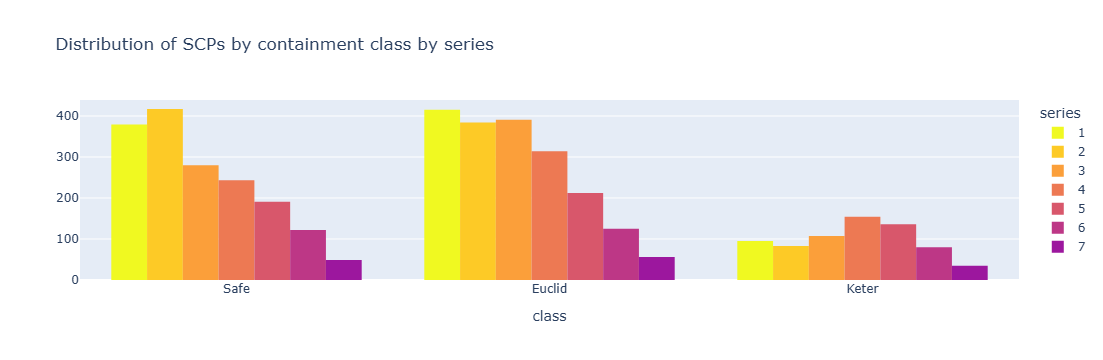

In [104]:
fig = px.histogram(class_counts, x="class", y="code", color="series", color_discrete_sequence=px.colors.sequential.Plasma_r, barmode="group",
                  title="Distribution of SCPs by containment class by series")
fig.update_xaxes(categoryorder="array", categoryarray=primary_classes)
fig.update_layout(yaxis_title="")
fig.update_traces(hovertemplate='Total SCPs: %{y}<extra></extra>')
fig.show()

## SCP mentions in other articles

In [106]:
top10 = df.sort_values(by='mentions', ascending=False).head(10)

In [110]:
top10[["code", "mentions"]]

,code,mentions
616,SCP-617,1003
457,SCP-458,783
605,SCP-606,754
299,SCP-300,733
478,SCP-479,703
501,SCP-502,697
499,SCP-500,696
309,SCP-310,691
444,SCP-445,687
300,SCP-301,682


## █ per article

In [195]:
def contains_count(string, elements):
    count = 0
    for element in elements:
        count += string.count(element)
    return count

In [197]:
black_df = df
black_df["black rectangles"] = black_df.apply(lambda row: contains_count(row["text"], ["█"]), axis=1)

In [227]:
topclasses = pd.DataFrame(df["class"].value_counts()).head(3).reset_index()
tclist = topclasses["class"].tolist()

In [229]:
tc_scps = black_df["class"].isin(tclist)
black_df = black_df[tc_scps]

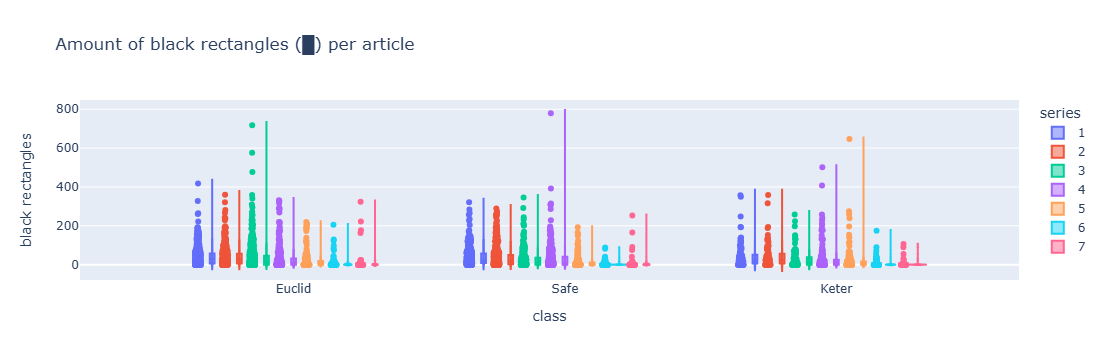

In [234]:
figure=px.violin(
            black_df,
            y="black rectangles",
            x="class",
            color="series",
            box=True,
            points="all",
            hover_data={"code":True, "title":True, "class": False, "series": False},
            title = "Amount of black rectangles (█) per article"
        )
figure.show()

## Average number of characters and popularity by class by series

In [241]:
df["length"]=df.apply(lambda row: len(row["text"]), axis=1)

In [243]:
df.describe()

,Unnamed: 0,rating,series,mentions,black rectangles,length
count,6618.000000,6611.000000,6618.000000,6618.000000,6618.000000,6618.000000
mean,3321.994107,171.366359,3.827894,32.704745,29.087186,9823.402841
std,1933.384973,257.473717,1.920317,106.884489,84.073691,9666.486295
min,0.000000,-36.000000,1.000000,-2.000000,0.000000,36.000000
25%,1654.250000,56.000000,2.000000,0.000000,0.000000,4461.500000
50%,3308.500000,107.000000,4.000000,0.000000,4.000000,7085.000000
75%,4962.750000,200.000000,5.000000,1.000000,32.000000,11739.500000
max,6998.000000,7663.000000,7.000000,1003.000000,4204.000000,211898.000000


In [263]:
ratings_df = df.dropna(subset=["rating"])
ratings_df = ratings_df[ratings_df["rating"] > 0]

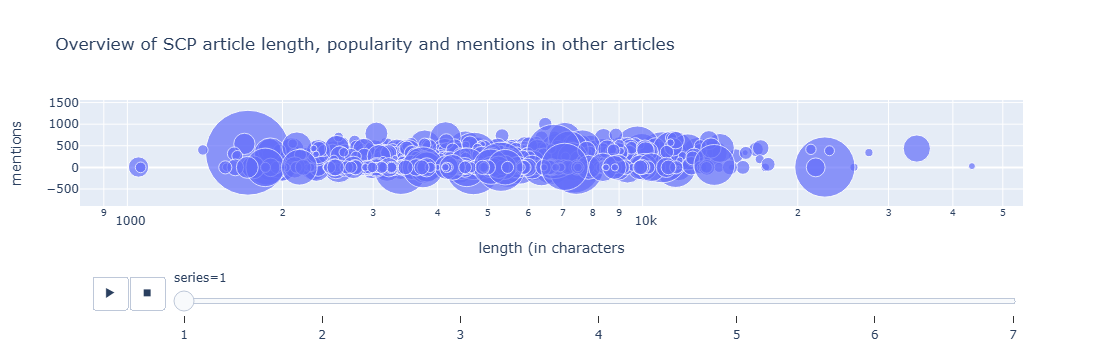

In [285]:
figure=px.scatter(
            ratings_df.dropna(subset=["rating"]),
            x="length",
            y="mentions",
            size="rating",
            #color="series",
            hover_name="code",
            animation_frame="series",
            hover_data = {"series":False},
            log_x=True,
            size_max=60,
            title="Overview of SCP article length, popularity and mentions in other articles",
        )
figure.update_layout(xaxis_title="length (in characters")
figure.show()